### 获取20类新闻数据集

In [5]:
from sklearn.datasets import fetch_20newsgroups

raw_train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=33)
raw_test_data = fetch_20newsgroups(subset='test', shuffle=True, random_state=33)

#filenames target_names target data 
print(raw_train_data.filenames[0])
print(raw_train_data.target_names)
print(raw_train_data.target[0])
print(raw_train_data.data[0])
print(type(raw_train_data.data))

/Users/didi/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61121
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
14
From: xrcjd@mudpuppy.gsfc.nasa.gov (Charles J. Divine)
Subject: Space Station Redesign Chief Resigns for Health Reasons
Organization: NASA/GSFC Greenbelt Maryland
Lines: 12

Writer Kathy Sawyer reported in today's Washington Post that Joseph Shea, the 
head of the space station redesign has resigned for health reasons.

Shea was hospitalized shortly after his selection in February.  He returned
yesterday to lead the formal presentation to the independent White House panel.
Shea's presentation was rambling and almost ina

### 数据可视化

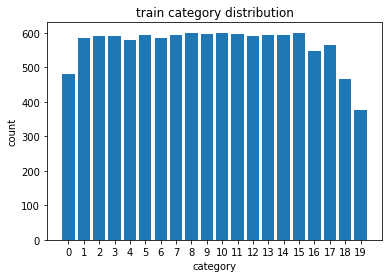

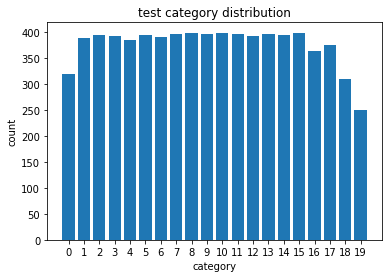

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

def category_distribution(data, title):
    distribution = Counter(data.target)
    xVals = list(distribution.keys())
    yVals = list(distribution.values())
    plt.title(title)
    plt.xlabel("category")
    plt.ylabel("count")
    plt.xticks(xVals)
    plt.bar(xVals, yVals, align='center', alpha=1)
    plt.show()
    
category_distribution(raw_train_data, "train category distribution")
category_distribution(raw_test_data, "test category distribution")

由上图可知，20类新闻包是一个分类平衡的数据集。

In [11]:
import numpy as np

def get_word_count_list(data):
    word_count_list = []
    for doc in data:
        word_count_list.append(len(doc.split()))
    return word_count_list

def word_count_info(word_count_list, data_name):
    print("max word count of the {} data is {}".format(data_name, np.max(word_count_list)))
    print("mean word count of the {} data is {}".format(data_name, np.mean(word_count_list)))
    print("median word count of the {} data is {}".format(data_name, np.median(word_count_list)))

train_word_list = get_word_count_list(raw_train_data.data)
test_word_list = get_word_count_list(raw_test_data.data)
word_count_info(train_word_list, "train")
word_count_info(test_word_list, "test")

max word count of the train data is 11821
mean word count of the train data is 287.4701255082199
median word count of the train data is 176.0
max word count of the test data is 9578
mean word count of the test data is 277.92671269251196
median word count of the test data is 173.0


由上图可知，训练集和测试集文档词条数统计信息相似。

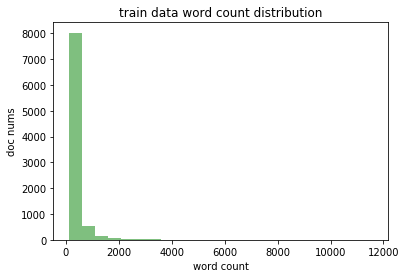

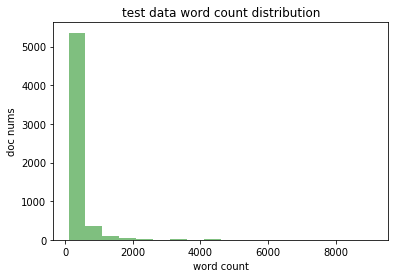

In [12]:
def word_count_distribution(word_count_list, desc):
    plt.hist(word_count_list, bins=range(100,np.max(word_count_list),500), color="green", alpha=0.5)
    plt.xlabel('word count')
    plt.ylabel('doc nums')
    plt.title('{} word count distribution'.format(desc))
    plt.show()
word_count_distribution(train_word_list, "train data")
word_count_distribution(test_word_list, "test data")

可以看出训练集和测试集文档的单词数绝大部分都是集中在500以上，一小部分在500到1000，其余单词数的文档所占比重极小。

### 数据预处理
1. 去掉文档的headers、footers、quotes
2. 定义文本预处理过滤器，去掉数字、标点符号及其他非法字符，统一单词为小写形式

In [19]:
import re

train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=33, remove=("headers", "footers"))
test_data = fetch_20newsgroups(subset='test', shuffle=True, random_state=33, remove=("headers", "footers"))

def data_filter(content):
    return re.sub('[\d\W]+', ' ', content.lower()).strip()

print(data_filter(raw_train_data.data[0]))

from xrcjd mudpuppy gsfc nasa gov charles j divine subject space station redesign chief resigns for health reasons organization nasa gsfc greenbelt maryland lines writer kathy sawyer reported in today s washington post that joseph shea the head of the space station redesign has resigned for health reasons shea was hospitalized shortly after his selection in february he returned yesterday to lead the formal presentation to the independent white house panel shea s presentation was rambling and almost inaudible shea s deputy former astronaut bryan o connor will take over the effort goldin asserted that the redesign effort is on track chuck divine


### 特征提取

#### 1. Tf-Idf
利用参数stop_words移除停用词

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(preprocessor=data_filter, stop_words='english')
tfidf_train = tfidf.fit_transform(train_data.data)
tfidf_test = tfidf.transform(test_data.data)
tfidf_raw_train = tfidf.fit_transform(raw_train_data.data)
tfidf_raw_test = tfidf.transform(raw_test_data.data)
print(type(tfidf_train[0]))

<class 'scipy.sparse.csr.csr_matrix'>


#### 2. Word2Vec

2.1 利用20newsgroups训练Word2Vec

In [6]:
from gensim.models import *

dim = 200

all_news = fetch_20newsgroups(subset='all')

In [35]:
sentences = [data_filter(text).split() for text in all_news.data]
w2v_model = Word2Vec(sentences, workers=4, min_count=1, size=dim, iter=10)
w2v_model.save('word2vec_model')

In [7]:
w2v_model = Word2Vec.load('word2vec_model')
w2v_model.wv.most_similar('post')

[('repost', 0.576711118221283),
 ('posted', 0.5601168274879456),
 ('followup', 0.5511782169342041),
 ('posts', 0.5496430397033691),
 ('newsgroup', 0.5399307608604431),
 ('postings', 0.5394784212112427),
 ('summarize', 0.5338574051856995),
 ('comment', 0.5240219831466675),
 ('answers', 0.518371045589447),
 ('topic', 0.5101109743118286)]

2.2 利用text8训练Word2Vec

In [37]:
import zipfile
import os
from urllib.request import urlretrieve

def data_download(url, filename):
    if not os.path.exists(filename):
        filename,_ = urlretrieve(url+filename,filename)
    else:
        print("{} has already existed".format(filename))
    return filename

text8 = data_download('http://mattmahoney.net/dc/', 'text8.zip')

def load_txts(fpath):
    fz = zipfile.ZipFile(fpath,'r')
    for file in fz.namelist():
        fz.extract(file)
    fz.close()
text8 = load_txts('text8.zip')

text8.zip has already existed


In [38]:
#训练Word2Vec
text =  word2vec.Text8Corpus('text8')
w2v_model2 = Word2Vec(text,  workers=4, min_count=1, size=dim, iter=10)
w2v_model2.save('word2vec_model2')

In [20]:
w2v_model2 = Word2Vec.load('word2vec_model2')
w2v_model2.wv.most_similar("post")

[('pre', 0.4663783013820648),
 ('beaumanor', 0.4652716815471649),
 ('audial', 0.44703882932662964),
 ('office', 0.4347648024559021),
 ('reisendorf', 0.40230923891067505),
 ('louvois', 0.39898520708084106),
 ('dc', 0.3935057520866394),
 ('continuation', 0.3869740962982178),
 ('bellorum', 0.384490430355072),
 ('kmelnytsky', 0.3835177421569824)]

### 机器学习分类模型
#### 定义评估指标函数，划分出训练集和验证集

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = tfidf_train
y = train_data.target
test_true = test_data.target

raw_X = tfidf_raw_train
raw_y = raw_train_data.target
raw_test_true = raw_test_data.target

X_train, X_verified, y_train, y_verified = train_test_split(X, y, random_state=10, test_size=0.1)
raw_X_train, raw_X_verified, raw_y_train, raw_y_verified = train_test_split(raw_X, raw_y, random_state=10, test_size=0.1)

def evaluate_model(model):
    model_name = model.__class__.__name__
    y_pred = model.predict(X_verified)
    print("accuracy score of {} on the validation set is {}".format(model_name, accuracy_score(y_verified, y_pred)))
    tfidf_pred = model.predict(tfidf_test)
    print("accuracy score of {} on the test set is {}".format(model_name, accuracy_score(test_true, tfidf_pred)))
    
def evaluate_raw_model(model):
    model_name = model.__class__.__name__
    y_pred = model.predict(raw_X_verified)
    print("accuracy score of {} on the raw validation set is {}".format(model_name, accuracy_score(raw_y_verified, y_pred)))
    tfidf_pred = model.predict(tfidf_raw_test)
    print("accuracy score of {} on the raw test set is {}".format(model_name, accuracy_score(raw_test_true, tfidf_pred)))

#### 基准模型 决策树+tfidf

In [41]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
evaluate_model(tree_model)
tree_model.fit(raw_X_train, raw_y_train)
evaluate_raw_model(tree_model)

accuracy score of DecisionTreeClassifier on the validation set is 0.5980565371024735
accuracy score of DecisionTreeClassifier on the test set is 0.5022570366436537
accuracy score of DecisionTreeClassifier on the raw validation set is 0.6722614840989399
accuracy score of DecisionTreeClassifier on the raw test set is 0.5784652150823154


#### 朴素贝叶斯+tfidf

In [32]:
from sklearn.naive_bayes import MultinomialNB

bayes_model = MultinomialNB()
bayes_model.fit(raw_X_train, raw_y_train)
evaluate_raw_model(bayes_model)

accuracy score of MultinomialNB on the raw validation set is 0.8754416961130742
accuracy score of MultinomialNB on the raw test set is 0.8085501858736059


#### 支持向量机+tfidf

In [35]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=10)
svm_model.fit(raw_X_train, raw_y_train)
evaluate_raw_model(svm_model)

accuracy score of LinearSVC on the raw validation set is 0.9240282685512368
accuracy score of LinearSVC on the raw test set is 0.8453266064790228


### 调优机器学习分类模型
利用网格搜索法GridSearchCV和k折交叉验证法KFold来优化贝叶斯和支持向量机模型，寻找模型最佳参数

#### 调优朴素贝叶斯

In [33]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer

scoring_fnc = make_scorer(accuracy_score)
kfold = KFold(n_splits=10, random_state=10)

parameters = {'alpha': [round(0.01*i, 3) for i in range(1, 100, 5)]}
bayes_grid = GridSearchCV(bayes_model, parameters, scoring_fnc, cv=kfold)
bayes_grid.fit(raw_X_train, raw_y_train)
best_bayes = bayes_grid.best_estimator_

evaluate_raw_model(best_bayes)
for key in parameters.keys():
    print('{}: {}'.format(key, best_bayes.get_params()[key]))

accuracy score of MultinomialNB on the raw validation set is 0.9143109540636042
accuracy score of MultinomialNB on the raw test set is 0.8278013807753585
alpha: 0.01


#### 调优支持向量机

In [36]:
C = [0.1*i for i in range(1, 20, 2)]
tol = [0.001, 0.01, 0.1]
parameters = {'C': C, 'tol': tol}
svm_grid = GridSearchCV(svm_model, parameters, cv=kfold)
svm_grid.fit(raw_X_train, raw_y_train)
best_svm = svm_grid.best_estimator_

evaluate_raw_model(best_svm)
for key in parameters.keys():
    print('{}: {}'.format(key, best_svm.get_params()[key]))

accuracy score of LinearSVC on the raw validation set is 0.9249116607773852
accuracy score of LinearSVC on the raw test set is 0.8445300053106745
C: 1.5
tol: 0.001


### 神经网络CNN分类模型+Word2Vec
1. 20newsgroups训练的Word2Vec

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model, Sequential
import numpy as np
from sklearn.model_selection import train_test_split

MAX_SEQUENCE_LENGTH = 300
MAX_NUM_WORDS = 15000

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(all_news.data)
sequences = tokenizer.texts_to_sequences(all_news.data)
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(all_news.target))
x_cnn_train, x_cnn_test, y_cnn_train, y_cnn_test = train_test_split(data, labels, test_size=0.2, random_state=33)

In [17]:
from keras.layers import Merge, concatenate
from keras.callbacks import EarlyStopping,TensorBoard

EMBEDDING_DIM = 200

def get_embedding_matrix(wv):
    embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items(): 
        if word in wv:
            embedding_matrix[i] = np.asarray(wv[word], dtype='float32')
    return embedding_matrix

def cnn_train(wv):
    embedding_matrix = get_embedding_matrix(wv)
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Conv1D(64, 3, activation='relu')(embedded_sequences)
    x = MaxPooling1D(3)(x)
    x = Flatten()(x)
    preds = Dense(labels.shape[1], activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    his = model.fit(x_cnn_train, y_cnn_train, validation_split=0.1, epochs=20, batch_size=128)
    result = model.evaluate(x_cnn_test, y_cnn_test)
    return his, result

def cnn_train_optimizer(wv):
    embedding_matrix = get_embedding_matrix(wv)
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Conv1D(64, 3, activation='relu')(embedded_sequences)
    x = MaxPooling1D(3)(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)
    x = Dense(EMBEDDING_DIM, activation='relu')(x)
    preds = Dense(labels.shape[1], activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    his = model.fit(x_cnn_train, y_cnn_train, validation_split=0.1, epochs=10, batch_size=64)
    result = model.evaluate(x_cnn_test, y_cnn_test)
    return his, result

def cnn_train_multi(wv):
    filters = 100
    
    early_stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, verbose=0)
    embedding_matrix = get_embedding_matrix(wv)
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    
    convs = []
    kernal_sizes = [2,3,4,5]
    for kernal_size in kernal_sizes:
        conv = Conv1D(filters, kernal_size, activation='relu')(embedded_sequences)
        conv = MaxPooling1D(MAX_SEQUENCE_LENGTH - kernal_size + 1)(conv)
        conv = Flatten()(conv)
        convs.append(conv)
    cnn = concatenate(convs, axis=1)
    cnn = Dropout(0.5)(cnn)
    cnn = Dense(EMBEDDING_DIM, activation='relu')(cnn)
    preds = Dense(labels.shape[1], activation='softmax')(cnn)
    
    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    his = model.fit(x_cnn_train, y_cnn_train, validation_split=0.1, epochs=40, batch_size=128, callbacks=[early_stop])
    result = model.evaluate(x_cnn_test, y_cnn_test)
    return his, result

In [51]:
his1, result = cnn_train(w2v_model.wv)
print(result)

Train on 13568 samples, validate on 1508 samples
Epoch 1/20
13568/13568 [==============================] - 36s 3ms/step - loss: 2.7723 - acc: 0.2194 - val_loss: 1.7853 - val_acc: 0.3972
Epoch 2/20
13568/13568 [==============================] - 44s 3ms/step - loss: 1.2213 - acc: 0.6080 - val_loss: 1.4180 - val_acc: 0.5312
Epoch 3/20
13568/13568 [==============================] - 44s 3ms/step - loss: 0.6828 - acc: 0.7994 - val_loss: 1.3934 - val_acc: 0.5464
Epoch 4/20
13568/13568 [==============================] - 34s 3ms/step - loss: 0.4056 - acc: 0.8928 - val_loss: 1.3996 - val_acc: 0.5769
Epoch 5/20
13568/13568 [==============================] - 34s 3ms/step - loss: 0.2284 - acc: 0.9524 - val_loss: 1.4270 - val_acc: 0.5743
Epoch 6/20
13568/13568 [==============================] - 33s 2ms/step - loss: 0.1361 - acc: 0.9790 - val_loss: 1.5943 - val_acc: 0.5723
Epoch 7/20
13568/13568 [==============================] - 33s 2ms/step - loss: 0.0833 - acc: 0.9915 - val_loss: 1.6933 - val_acc:

In [52]:
his1, result = cnn_train(w2v_model2.wv)
print(result)

Train on 13568 samples, validate on 1508 samples
Epoch 1/20
13568/13568 [==============================] - 30s 2ms/step - loss: 2.8850 - acc: 0.1780 - val_loss: 2.0918 - val_acc: 0.3110
Epoch 2/20
13568/13568 [==============================] - 30s 2ms/step - loss: 1.4585 - acc: 0.5321 - val_loss: 1.6458 - val_acc: 0.4622
Epoch 3/20
13568/13568 [==============================] - 30s 2ms/step - loss: 0.8485 - acc: 0.7503 - val_loss: 1.5813 - val_acc: 0.4987
Epoch 4/20
13568/13568 [==============================] - 30s 2ms/step - loss: 0.5144 - acc: 0.8636 - val_loss: 1.6352 - val_acc: 0.5113
Epoch 5/20
13568/13568 [==============================] - 33s 2ms/step - loss: 0.3181 - acc: 0.9298 - val_loss: 1.7664 - val_acc: 0.5040
Epoch 6/20
13568/13568 [==============================] - 32s 2ms/step - loss: 0.2039 - acc: 0.9643 - val_loss: 1.7667 - val_acc: 0.5239
Epoch 7/20
13568/13568 [==============================] - 31s 2ms/step - loss: 0.1282 - acc: 0.9838 - val_loss: 1.8966 - val_acc:

In [53]:
his, result = cnn_train_multi(w2v_model.wv)
print(result)

Train on 13568 samples, validate on 1508 samples
Epoch 1/40
13568/13568 [==============================] - 164s 12ms/step - loss: 3.9207 - acc: 0.0688 - val_loss: 2.9708 - val_acc: 0.0895
Epoch 2/40
13568/13568 [==============================] - 162s 12ms/step - loss: 2.9262 - acc: 0.0942 - val_loss: 2.7758 - val_acc: 0.1293
Epoch 3/40
13568/13568 [==============================] - 163s 12ms/step - loss: 2.5920 - acc: 0.1586 - val_loss: 2.2026 - val_acc: 0.2812
Epoch 4/40
13568/13568 [==============================] - 154s 11ms/step - loss: 2.0905 - acc: 0.2999 - val_loss: 1.6370 - val_acc: 0.4781
Epoch 5/40
13568/13568 [==============================] - 156s 12ms/step - loss: 1.6152 - acc: 0.4430 - val_loss: 1.3255 - val_acc: 0.5577
Epoch 6/40
13568/13568 [==============================] - 161s 12ms/step - loss: 1.3483 - acc: 0.5327 - val_loss: 1.1965 - val_acc: 0.6088
Epoch 7/40
13568/13568 [==============================] - 162s 12ms/step - loss: 1.1828 - acc: 0.5929 - val_loss: 1.0

In [21]:
his, result = cnn_train_multi(w2v_model2.wv)
print(result)

Train on 13568 samples, validate on 1508 samples
Epoch 1/40
13568/13568 [==============================] - 139s 10ms/step - loss: 3.6699 - acc: 0.0623 - val_loss: 2.9269 - val_acc: 0.0603
Epoch 2/40
13568/13568 [==============================] - 135s 10ms/step - loss: 2.7570 - acc: 0.1335 - val_loss: 2.3061 - val_acc: 0.2434
Epoch 3/40
13568/13568 [==============================] - 128s 9ms/step - loss: 2.2212 - acc: 0.2512 - val_loss: 1.8610 - val_acc: 0.3939
Epoch 4/40
13568/13568 [==============================] - 120s 9ms/step - loss: 1.8758 - acc: 0.3578 - val_loss: 1.5933 - val_acc: 0.4973
Epoch 5/40
13568/13568 [==============================] - 120s 9ms/step - loss: 1.6160 - acc: 0.4460 - val_loss: 1.3850 - val_acc: 0.5504
Epoch 6/40
13568/13568 [==============================] - 132s 10ms/step - loss: 1.3876 - acc: 0.5206 - val_loss: 1.2128 - val_acc: 0.6041
Epoch 7/40
13568/13568 [==============================] - 134s 10ms/step - loss: 1.2076 - acc: 0.5895 - val_loss: 1.0902

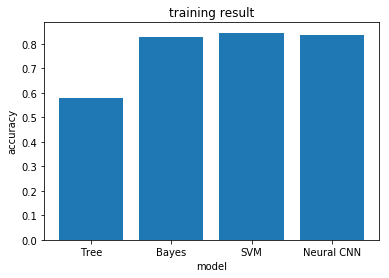

In [24]:
models = ["Tree", "Bayes", "SVM", "Neural CNN"]
scores = [0.578, 0.828, 0.845, 0.836]
plt.title("training result")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.bar(range(len(scores)), scores, tick_label = models, align='center', alpha=1)
plt.show()

Text(0,0.5,'score')

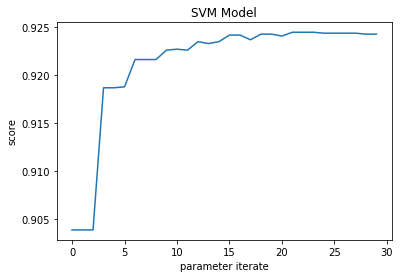

In [37]:
plt.plot(svm_grid.cv_results_['mean_test_score'])
plt.title('SVM Model')
plt.xlabel('parameter iterate')
plt.ylabel('score')

### RNN

In [14]:
from keras.layers import GRU

def rnn_train(wv):
    embedding_matrix = get_embedding_matrix(wv)
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=False)

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Dropout(0.3)(embedded_sequences)
    x = GRU(128, recurrent_dropout=0.3)(x)
    preds = Dense(labels.shape[1], activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    his = model.fit(x_cnn_train, y_cnn_train, validation_split=0.1, epochs=20, batch_size=64)
    result = model.evaluate(x_cnn_test, y_cnn_test)
    return his, result

In [18]:
rnn_train(w2v_model.wv)

Train on 13568 samples, validate on 1508 samples
Epoch 1/20
13568/13568 [==============================] - 208s 15ms/step - loss: 2.7044 - acc: 0.1919 - val_loss: 2.3113 - val_acc: 0.2944
Epoch 2/20
13568/13568 [==============================] - 166s 12ms/step - loss: 2.0820 - acc: 0.3376 - val_loss: 1.7924 - val_acc: 0.4052
Epoch 3/20
13568/13568 [==============================] - 165s 12ms/step - loss: 1.5996 - acc: 0.4749 - val_loss: 1.3212 - val_acc: 0.5464
Epoch 4/20
13568/13568 [==============================] - 163s 12ms/step - loss: 1.2394 - acc: 0.5925 - val_loss: 1.0655 - val_acc: 0.6505
Epoch 5/20
13568/13568 [==============================] - 182s 13ms/step - loss: 1.0347 - acc: 0.6640 - val_loss: 0.9514 - val_acc: 0.6804
Epoch 6/20
13568/13568 [==============================] - 170s 13ms/step - loss: 0.8933 - acc: 0.7100 - val_loss: 0.8495 - val_acc: 0.7221
Epoch 7/20
13568/13568 [==============================] - 169s 12ms/step - loss: 0.7898 - acc: 0.7516 - val_loss: 0.7

(<keras.callbacks.History at 0x1a26bcab38>,
 [0.54543177918666874, 0.83368700271576091])